## Final Project

# Food Data Analysis 

__Data Source__

1) Calories in Food items (330 KB)
- 2014 Rows and 26 Columns
- https://healthdata.gov/dataset/MyPyramid-Food-Raw-Data/ix5i-ix8v/data


2) Nutrients in Food items(1.91 MB)
- 6454 Rows and 48 Columns
- https://healthdata.gov/dataset/SuperTracker-source-code-and-foods-database/dq69-zshb

__Introduction__

We are aware that food plays an important role in building our body. Food components have vast metabolic roles and could affect human health severely. Food nutrition analysis helps in the detailed and perfect determination of the component nutrients present in any food item. Above dataset has information about commonly eaten foods with corresponding commonly used portion amounts. Data provides information on the total calories; calories from solid fats, added sugars, and alcohol (etc) and calcium, protein, water content in the food item. Through this project, I want to enrich my knowledge about food nutrition values.


__Objectives__

- To discover which food has the highest calories.
- To find the correlation between the type of food and nutrients in it.
- To discover from which food we get the highest calories from added sugar.
- To identify unhealthy food choices.

In [1]:
import requests 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Converting .xlsx file into pandas dataframe and adding index column.

food_df1 = pd.read_excel('Food_Display_Table.xlsx', index_col= 0).reset_index()

# Converting second dataset .xlsx file into pandas dataframe and adding index column.

food_df2 = pd.read_excel('SuperFoodDatabase.xlsx', index_col= 0).reset_index()



#### Understanding the dataset

In [3]:
# Checking the characteristics of the data.

food_df1.head(5)

,Food_Code,Display_Name,Portion_Default,Portion_Amount,Portion_Display_Name,Factor,Increment,Multiplier,Grains,Whole_Grains,...,Milk,Meats,Soy,Drybeans_Peas,Oils,Solid_Fats,Added_Sugars,Alcohol,Calories,Saturated_Fats
0,12350000,Sour cream dip,1,0.25,cup,0.25,0.25,1.00,0.04799,0.0,...,0.00000,0.0000,0.0,0.0,0.0,105.64850,1.57001,0.0,133.65,7.36898
1,13110100,"Ice cream, regular",1,1.00,cup,1.00,0.25,0.25,0.00000,0.0,...,0.29393,0.0000,0.0,0.0,0.0,130.99968,95.20488,0.0,267.33,9.03070
2,13110120,"Ice cream, rich",1,1.00,cup,1.00,0.25,0.25,0.00000,0.0,...,0.25160,0.0962,0.0,0.0,0.0,213.06672,96.10340,0.0,368.52,15.28840
3,13110200,Soft serve ice cream,1,1.00,cup,1.00,0.25,0.25,0.00000,0.0,...,0.38233,0.0000,0.0,0.0,0.0,170.39808,123.83793,0.0,347.73,11.74670
4,13120100,"Ice cream bar, chocolate covered",1,1.00,bar (bar = 3 fl oz),1.00,0.50,0.50,0.00000,0.0,...,0.09744,0.0000,0.0,0.0,0.0,112.32144,45.54761,0.0,169.12,9.58720


In [4]:
food_df2.head(5)

,Food_Item_ID,foodcode,modcode,foodname,_203 Protein (g),_204 Total Fat (g),_205 Carbohydrate (g),_208 Energy (kcal),_221 Alcohol (g),_255 Water (g),...,_418 Vitamin B-12 (mcg),"_421 Choline, total (mg)",_430 Vitamin K (phylloquinone)(mcg),_431 Folic acid (mcg),"_432 Folate, food (mcg)","_435 Folate, DFE (mcg_DFE)","_573 Vitamin E, added (mg)","_578 Vitamin B-12, added (mcg)",_601 Cholesterol (mg),"_606 Fatty acids, total saturated (g)"
0,1,11111000,0,"Milk, whole",3.1499,3.2500,4.7999,61.0,0.0,88.1299,...,0.45,14.3000,0.3,0.0,5.0,5.0,0.0,0.0,10.0,1.8650
1,2,11111100,0,"Milk, whole, low-sodium",3.1000,3.4599,4.4599,61.0,0.0,88.2000,...,0.36,16.0000,0.3,0.0,5.0,5.0,0.0,0.0,14.0,2.1539
2,3,11111150,0,"Milk, whole, calcium fortified",3.1499,3.2500,4.7999,61.0,0.0,88.1299,...,0.45,14.3000,0.3,0.0,5.0,5.0,0.0,0.0,10.0,1.8650
3,4,11111160,0,"1% milk, calcium fortified",3.3700,0.9700,4.9900,42.0,0.0,89.9200,...,0.47,17.6999,0.1,0.0,5.0,5.0,0.0,0.0,5.0,0.6330
4,5,11111170,0,"Fat free milk, calcium fortified",3.3999,0.1800,4.8498,35.0,0.0,90.7998,...,0.38,16.0000,0.0,0.0,5.0,5.0,0.0,0.0,2.0,0.1170


In [5]:
# Number of rows and columns in dataframe.

food_df1.shape

(2014, 26)

In [6]:
# Number of rows and columns in second dataframe.
food_df2.shape

(6454, 48)

In [7]:
# Column names and their data types with missing value information.
food_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014 entries, 0 to 2013
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Food_Code             2014 non-null   int64  
 1   Display_Name          2014 non-null   object 
 2   Portion_Default       2014 non-null   int64  
 3   Portion_Amount        2014 non-null   float64
 4   Portion_Display_Name  2014 non-null   object 
 5   Factor                2011 non-null   float64
 6   Increment             2014 non-null   float64
 7   Multiplier            2014 non-null   float64
 8   Grains                2014 non-null   float64
 9   Whole_Grains          2014 non-null   float64
 10  Vegetables            2014 non-null   float64
 11  Orange_Vegetables     2014 non-null   float64
 12  Drkgreen_Vegetables   2014 non-null   float64
 13  Starchy_vegetables    2014 non-null   float64
 14  Other_Vegetables      2014 non-null   float64
 15  Fruits               

In [8]:
food_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Food_Item_ID                           6454 non-null   int64  
 1   foodcode                               6454 non-null   int64  
 2   modcode                                6454 non-null   int64  
 3   foodname                               6454 non-null   object 
 4   _203 Protein (g)                       6454 non-null   float64
 5   _204 Total Fat (g)                     6454 non-null   float64
 6   _205 Carbohydrate (g)                  6453 non-null   float64
 7   _208 Energy (kcal)                     6454 non-null   float64
 8   _221 Alcohol (g)                       6454 non-null   float64
 9   _255 Water (g)                         6454 non-null   float64
 10  _262 Caffeine (mg)                     6454 non-null   float64
 11  _263

__Data Information and Inconsistency__

In this data set all the nutrients are given in Kcal. And columns which don't have calories information those units are written in the column name. first dataset gives the amount of calories coming from grains, vegetables,milk, oils etc in the given food item. And second dataset gives the information about vitamins, mineral, water, protien content in the food item. It is easy to study this dataset because all the information is given about generally how much food we eat.

At this initial stage inconsistency in the data are:

- Food items are not in a single measurement unit. 
- Portion_Default column is giving similar information as Portion_Amount
- Factor, Increment, Multiplier columns are not informatory (Unable to understand).
- Display_Name and Portion_Display_Name column datatype should be string.
- Both dataframe have diffrent column names for same data (foodname)
- Second dataframe has lot of columns we need to extract required columns from it.



__Merging DataFrames__

In [9]:
# Change the names in second dataframe

food_df2 = food_df2.rename(columns={'foodcode': 'Food_Code'})

In [12]:
food_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Food_Item_ID                           6454 non-null   int64  
 1   Food_Code                              6454 non-null   int64  
 2   modcode                                6454 non-null   int64  
 3   foodname                               6454 non-null   object 
 4   _203 Protein (g)                       6454 non-null   float64
 5   _204 Total Fat (g)                     6454 non-null   float64
 6   _205 Carbohydrate (g)                  6453 non-null   float64
 7   _208 Energy (kcal)                     6454 non-null   float64
 8   _221 Alcohol (g)                       6454 non-null   float64
 9   _255 Water (g)                         6454 non-null   float64
 10  _262 Caffeine (mg)                     6454 non-null   float64
 11  _263

__Note :__ This Dataset has detailed information about nutritions in the food items. So will extract the columns which are generally known.

In [13]:
# Extracting required columns into new dataframe.

new_df2 = food_df2[['Food_Code', 'foodname', '_203 Protein (g)','_204 Total Fat (g)', '_205 Carbohydrate (g)',
               '_255 Water (g)', '_262 Caffeine (mg)','_301 Calcium (mg)', '_303 Iron (mg)',
               '_328 Vitamin D (mcg)', '_323 Vitamin E (alpha-tocopherol)(mg)', '_401 Vitamin C (mg)',
               '_601 Cholesterol (mg)','_606 Fatty acids, total saturated (g)' ]].copy()

In [14]:
# Merging two dataframes with Food_Code as column to match.

merge_df= food_df1.merge(new_df2, on='Food_Code')
merge_df.shape

(2247, 39)

__Note :__ Final Dataframe after merging has 2247 rows and 39 columns 

In [15]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2247 entries, 0 to 2246
Data columns (total 39 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Food_Code                              2247 non-null   int64  
 1   Display_Name                           2247 non-null   object 
 2   Portion_Default                        2247 non-null   int64  
 3   Portion_Amount                         2247 non-null   float64
 4   Portion_Display_Name                   2247 non-null   object 
 5   Factor                                 2244 non-null   float64
 6   Increment                              2247 non-null   float64
 7   Multiplier                             2247 non-null   float64
 8   Grains                                 2247 non-null   float64
 9   Whole_Grains                           2247 non-null   float64
 10  Vegetables                             2247 non-null   float64
 11  Oran

__Cleaning the Data__

In [16]:
# Dropping foodname column as we have Display_Name column for the food names.
merge_df = merge_df.drop(['foodname'], axis=1)

In [17]:
# Changing the column name to food name
merge_df = merge_df.rename(columns={'Display_Name': 'Food_Name'})

In [18]:
# Converting the data type base on the contents of the column.

merge_df['Food_Name'] = merge_df.Food_Name.astype(str)
merge_df['Portion_Display_Name'] = merge_df.Portion_Display_Name.astype(str)

In [19]:
# Below Columns are not providing the information about calories in food item.

merge_df = merge_df.drop(['Factor'], axis=1)
merge_df = merge_df.drop(['Increment'], axis=1)
merge_df = merge_df.drop(['Multiplier'], axis=1)
merge_df = merge_df.drop(['Portion_Default'], axis=1)

In [20]:
#Selecting random columns for checking the consistency in the dataframe.

merge_df.sample(5).T

,1143,1174,443,842,876
Food_Code,58106320,58125110,92410210,71905110,73102211
Food_Name,"Vegetable pizza, thin crust","Quiche (with meat, poultry or fish)",Club soda (seltzer),Fried plantain,Cooked carrots
Portion_Amount,1.0,1.0,1.0,0.5,0.5
Portion_Display_Name,slice (1/8 med pizza),"piece (1/8 of 9"" quiche)",cup,medium plantain,cup slices
Grains,1.1235,1.81824,0.0,0.0,0.0
Whole_Grains,0.0,0.0,0.0,0.0,0.0
Vegetables,0.3241,0.00576,0.0,0.58608,0.49998
Orange_Vegetables,0.0,0.0,0.0,0.0,0.49998
Drkgreen_Vegetables,0.0,0.0,0.0,0.0,0.0
Starchy_vegetables,0.0,0.0,0.0,0.58608,0.0


In [21]:
merge_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Food_Code,2247.0,5.281003e+07,2.470894e+07,11111000.00,2.631912e+07,5.440311e+07,7.375500e+07,9.421010e+07
Portion_Amount,2247.0,1.276925e+00,1.606039e+00,0.25,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+01
Grains,2247.0,4.525365e-01,8.817293e-01,0.00,0.000000e+00,0.000000e+00,6.204000e-01,8.291140e+00
Whole_Grains,2247.0,4.483236e-02,2.647622e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,5.038260e+00
Vegetables,2247.0,1.157269e-01,2.573391e-01,0.00,0.000000e+00,0.000000e+00,5.436000e-02,3.444000e+00
Orange_Vegetables,2247.0,1.020893e-02,6.885197e-02,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000640e+00
Drkgreen_Vegetables,2247.0,6.191753e-03,4.880103e-02,0.00,0.000000e+00,0.000000e+00,0.000000e+00,6.220800e-01
Starchy_vegetables,2247.0,4.126825e-02,1.937577e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,3.444000e+00
Other_Vegetables,2247.0,5.806584e-02,1.553278e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.035300e+00
Fruits,2247.0,4.847399e-02,1.966690e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,3.763760e+00


In [22]:
# Food_Code is unique number for all the food items so converting it to string type

merge_df['Food_Code'] = merge_df.Food_Code.astype(str)
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2247 entries, 0 to 2246
Data columns (total 34 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Food_Code                              2247 non-null   object 
 1   Food_Name                              2247 non-null   object 
 2   Portion_Amount                         2247 non-null   float64
 3   Portion_Display_Name                   2247 non-null   object 
 4   Grains                                 2247 non-null   float64
 5   Whole_Grains                           2247 non-null   float64
 6   Vegetables                             2247 non-null   float64
 7   Orange_Vegetables                      2247 non-null   float64
 8   Drkgreen_Vegetables                    2247 non-null   float64
 9   Starchy_vegetables                     2247 non-null   float64
 10  Other_Vegetables                       2247 non-null   float64
 11  Frui

In [23]:
# Changing the names of columns which have space in it.

merge_df = merge_df.rename(columns={'_203 Protein (g)': 'Protein_(g)', '_204 Total Fat (g)': 'Total_Fat_(g)', 
                '_205 Carbohydrate (g)': 'Carbohydrate_(g)','_255 Water (g)': 'Water_(g)', 
                '_262 Caffeine (mg)': 'Caffeine_(mg)','_301 Calcium (mg)' : 'Calcium_(mg)', 
                '_303 Iron (mg)': 'Iron_(mg)', '_328 Vitamin D (mcg)': 'Vitamin_D_(mcg)' ,
                '_323 Vitamin E (alpha-tocopherol)(mg)': 'Vitamin_E_(mg)', '_401 Vitamin C (mg)': 'Vitamin_C_(mg)' ,
               '_601 Cholesterol (mg)': 'Cholesterol_(mg)','_606 Fatty acids, total saturated (g)': 'Fatty_acids_(g)'})

__Sanity check__

- Checking the distribution of values.
- Checking for the repeated values.
- Outliers in the data (minimum and maximum values).
- Checking why the values are repeated to verify if there are duplicate entries.

In [24]:
# Checking the overall distribution of the data in columns with dtype object.

merge_df.describe(include='object')

,Food_Code,Food_Name,Portion_Display_Name
count,2247,2247,2247
unique,917,917,677
top,92101900,Latte,cup
freq,28,28,505


__Insight :__ Some of the food items and respective codes are repeated in the dataset.

In [25]:
# Most repeated food

merge_df[merge_df['Food_Code'] == '92101900'].T


,117,118,119,120,121,122,123,124,125,126,...,135,136,137,138,139,140,141,142,143,144
Food_Code,92101900,92101900,92101900,92101900,92101900,92101900,92101900,92101900,92101900,92101900,...,92101900,92101900,92101900,92101900,92101900,92101900,92101900,92101900,92101900,92101900
Food_Name,Latte,Latte,Latte,Latte,Latte,Latte,Latte,Latte,Latte,Latte,...,Latte,Latte,Latte,Latte,Latte,Latte,Latte,Latte,Latte,Latte
Portion_Amount,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Portion_Display_Name,medium (14 fl oz order),medium (14 fl oz order),medium (14 fl oz order),medium (14 fl oz order),medium (14 fl oz order),medium (14 fl oz order),medium (14 fl oz order),cup,cup,cup,...,large (17 fl oz order),large (17 fl oz order),large (17 fl oz order),small (11 fl oz order),small (11 fl oz order),small (11 fl oz order),small (11 fl oz order),small (11 fl oz order),small (11 fl oz order),small (11 fl oz order)
Grains,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Whole_Grains,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Vegetables,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Orange_Vegetables,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Drkgreen_Vegetables,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Starchy_vegetables,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


__Insight :__ Same food has multiple entries with different portion amount.

In [26]:
# Checking for other repeated entries.

merge_df['Food_Code'].value_counts()

92101900    28
92161000    28
26319140    20
24127150    20
26319120    20
            ..
58100530     1
63101330     1
62107200     1
62101300     1
57304100     1
Name: Food_Code, Length: 917, dtype: int64

In [27]:
merge_df[merge_df['Food_Code'] == '92161000']

,Food_Code,Food_Name,Portion_Amount,Portion_Display_Name,Grains,Whole_Grains,Vegetables,Orange_Vegetables,Drkgreen_Vegetables,Starchy_vegetables,...,Carbohydrate_(g),Water_(g),Caffeine_(mg),Calcium_(mg),Iron_(mg),Vitamin_D_(mcg),Vitamin_E_(mg),Vitamin_C_(mg),Cholesterol_(mg),Fatty_acids_(g)
145,92161000,Cappuccino,1.0,medium (17 fl oz order),0.0,0.0,0.0,0.0,0.0,0.0,...,2.5800,93.5300,20.0,60.0,0.04,0.7,0.04,0.0,5.0,0.946
146,92161000,Cappuccino,1.0,medium (17 fl oz order),0.0,0.0,0.0,0.0,0.0,0.0,...,2.5800,94.0699,20.0,64.0,0.03,0.6,0.02,0.1,4.0,0.638
147,92161000,Cappuccino,1.0,medium (17 fl oz order),0.0,0.0,0.0,0.0,0.0,0.0,...,2.6600,94.8900,20.0,65.0,0.04,0.6,0.01,0.0,1.0,0.030
148,92161000,Cappuccino,1.0,medium (17 fl oz order),0.0,0.0,0.0,0.0,0.0,0.0,...,2.6699,94.4300,20.0,66.0,0.04,0.6,0.01,0.0,3.0,0.322
149,92161000,Cappuccino,1.0,medium (17 fl oz order),0.0,0.0,0.0,0.0,0.0,0.0,...,2.3199,89.7399,20.0,56.0,0.06,0.1,0.18,0.4,19.0,3.613
150,92161000,Cappuccino,1.0,medium (17 fl oz order),0.0,0.0,0.0,0.0,0.0,0.0,...,17.7700,74.4398,21.0,6.0,0.32,0.0,0.80,0.0,0.0,1.326
151,92161000,Cappuccino,1.0,medium (17 fl oz order),0.0,0.0,0.0,0.0,0.0,0.0,...,2.6800,94.5900,20.0,63.0,0.24,0.5,0.06,0.0,0.0,0.106
152,92161000,Cappuccino,1.0,large (20 fl oz order),0.0,0.0,0.0,0.0,0.0,0.0,...,2.5800,93.5300,20.0,60.0,0.04,0.7,0.04,0.0,5.0,0.946
153,92161000,Cappuccino,1.0,large (20 fl oz order),0.0,0.0,0.0,0.0,0.0,0.0,...,2.5800,94.0699,20.0,64.0,0.03,0.6,0.02,0.1,4.0,0.638
154,92161000,Cappuccino,1.0,large (20 fl oz order),0.0,0.0,0.0,0.0,0.0,0.0,...,2.6600,94.8900,20.0,65.0,0.04,0.6,0.01,0.0,1.0,0.030


In [28]:
merge_df[merge_df['Food_Code'] == '24127150']

,Food_Code,Food_Name,Portion_Amount,Portion_Display_Name,Grains,Whole_Grains,Vegetables,Orange_Vegetables,Drkgreen_Vegetables,Starchy_vegetables,...,Carbohydrate_(g),Water_(g),Caffeine_(mg),Calcium_(mg),Iron_(mg),Vitamin_D_(mcg),Vitamin_E_(mg),Vitamin_C_(mg),Cholesterol_(mg),Fatty_acids_(g)
1340,24127150,"Battered fried chicken breast, no skin",1.0,medium breast,0.84348,0.0,0.0,0.0,0.0,0.0,...,9.6600,53.1599,0.0,12.0,0.94,0.0,0.99,0.0,77.0,2.709
1341,24127150,"Battered fried chicken breast, no skin",1.0,medium breast,0.84348,0.0,0.0,0.0,0.0,0.0,...,10.2500,59.0900,0.0,13.0,1.00,0.0,0.51,0.0,82.0,0.675
1342,24127150,"Battered fried chicken breast, no skin",1.0,medium breast,0.84348,0.0,0.0,0.0,0.0,0.0,...,9.6600,53.1599,0.0,12.0,0.95,0.0,1.50,0.0,77.0,1.722
1343,24127150,"Battered fried chicken breast, no skin",1.0,medium breast,0.84348,0.0,0.0,0.0,0.0,0.0,...,9.6699,56.3599,0.0,14.0,0.94,0.2,0.89,0.0,77.0,1.480
1344,24127150,"Battered fried chicken breast, no skin",1.0,medium breast,0.84348,0.0,0.0,0.0,0.0,0.0,...,9.6600,54.4799,0.0,14.0,0.94,0.2,0.67,0.0,95.0,4.900
1345,24127150,"Battered fried chicken breast, no skin",1.0,large breast,0.94501,0.0,0.0,0.0,0.0,0.0,...,9.6600,53.1599,0.0,12.0,0.94,0.0,0.99,0.0,77.0,2.709
1346,24127150,"Battered fried chicken breast, no skin",1.0,large breast,0.94501,0.0,0.0,0.0,0.0,0.0,...,10.2500,59.0900,0.0,13.0,1.00,0.0,0.51,0.0,82.0,0.675
1347,24127150,"Battered fried chicken breast, no skin",1.0,large breast,0.94501,0.0,0.0,0.0,0.0,0.0,...,9.6600,53.1599,0.0,12.0,0.95,0.0,1.50,0.0,77.0,1.722
1348,24127150,"Battered fried chicken breast, no skin",1.0,large breast,0.94501,0.0,0.0,0.0,0.0,0.0,...,9.6699,56.3599,0.0,14.0,0.94,0.2,0.89,0.0,77.0,1.480
1349,24127150,"Battered fried chicken breast, no skin",1.0,large breast,0.94501,0.0,0.0,0.0,0.0,0.0,...,9.6600,54.4799,0.0,14.0,0.94,0.2,0.67,0.0,95.0,4.900


__Note :__ In the all above foods usually the first entry has generally eaten portion amount. So dropping all the duplicate values and keeping the first value.

In [29]:
# Dropping duplicate values and verifying 

merge_df=merge_df.drop_duplicates('Food_Code', keep='first')
merge_df['Food_Code'].value_counts()

12350000    1
26319140    1
27111410    1
27111500    1
27112010    1
           ..
75233011    1
75234011    1
75235000    1
75236500    1
57304100    1
Name: Food_Code, Length: 917, dtype: int64

In [30]:
# Checking the overall distribution of the data in columns.

merge_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Portion_Amount,917.0,0.944656,0.623856,0.25,1.0000,1.0000,1.00000,10.00000
Grains,917.0,0.494141,0.829842,0.00,0.0000,0.0000,0.76608,6.66770
Whole_Grains,917.0,0.055449,0.288073,0.00,0.0000,0.0000,0.00000,4.03830
Vegetables,917.0,0.120671,0.251240,0.00,0.0000,0.0000,0.12276,3.44400
Orange_Vegetables,917.0,0.009098,0.060469,0.00,0.0000,0.0000,0.00000,1.00064
Drkgreen_Vegetables,917.0,0.008099,0.054558,0.00,0.0000,0.0000,0.00000,0.62208
Starchy_vegetables,917.0,0.036636,0.179469,0.00,0.0000,0.0000,0.00000,3.44400
Other_Vegetables,917.0,0.066856,0.160693,0.00,0.0000,0.0000,0.00291,1.00000
Fruits,917.0,0.053385,0.188843,0.00,0.0000,0.0000,0.00000,2.29336
Milk,917.0,0.092284,0.258130,0.00,0.0000,0.0000,0.00000,2.60568


In [31]:
# Increasing the size of display box
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 40em; }</style>"))

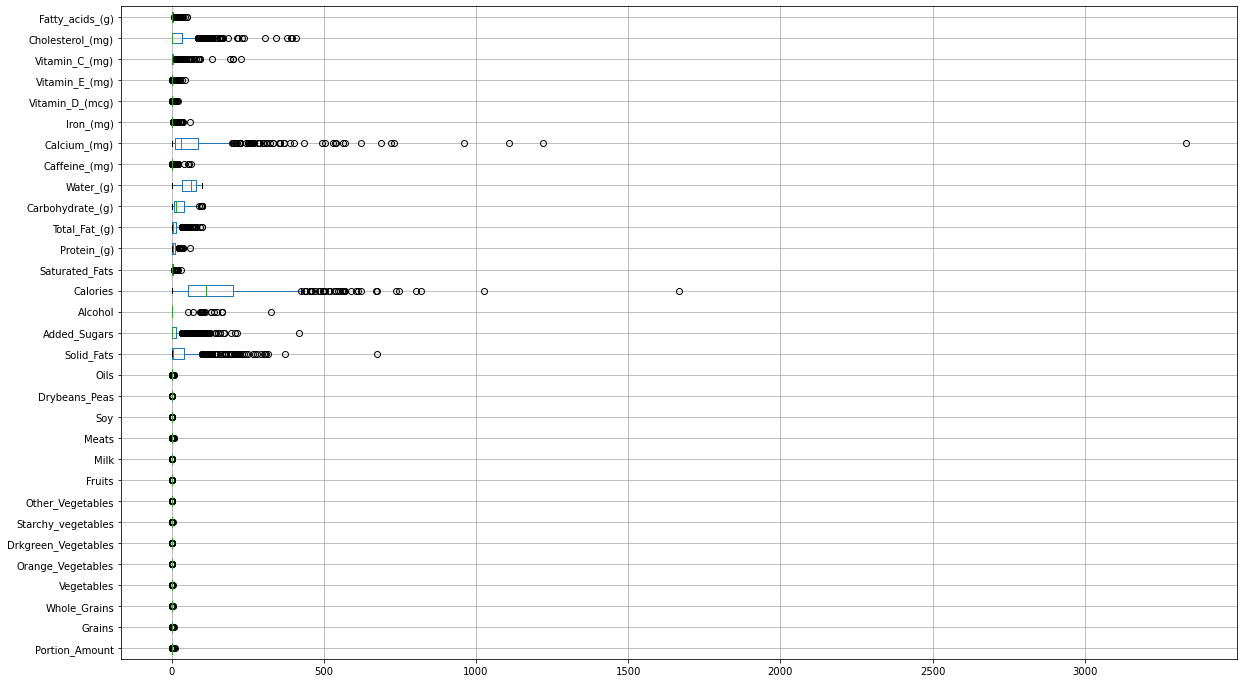

In [37]:
# Visualizing the distribution of data in each column


plt.figure(figsize=(20,12))
merge_df.boxplot(vert=False)
plt.show()

__Observation:__ From the graph we can see that Calcium,Calories, Alcohol, Added_sugar and Solid_fats columns values are much larger than other values. And also in these columns there are outliers which we will remove first.

In [38]:
# Checking which food item has highest calories 

merge_df[merge_df['Calories']== 1667.400000]

,Food_Code,Food_Name,Portion_Amount,Portion_Display_Name,Grains,Whole_Grains,Vegetables,Orange_Vegetables,Drkgreen_Vegetables,Starchy_vegetables,...,Carbohydrate_(g),Water_(g),Caffeine_(mg),Calcium_(mg),Iron_(mg),Vitamin_D_(mcg),Vitamin_E_(mg),Vitamin_C_(mg),Cholesterol_(mg),Fatty_acids_(g)
815,71411000,Potato skin with cheese & bacon,1.0,order (10 halves),0.0,0.0,3.444,0.0,0.0,3.444,...,43.25,21.5598,0.0,149.0,5.29,0.2,0.54,15.9,34.0,7.115


__Note:__ This food item's portion_amount is not proper. We cannot understand the 1667 calories distribution in the food. Replacing the value to zero will not be the option in this case as we have calories from solid fats but we also cannot continue with the wrong data.

In [39]:
# Dropping the row with calories 1667

merge_df.drop(merge_df[merge_df['Calories']== 1667.400000].index, inplace = True)

In [40]:
# Creating new dataframe of food items which high amount of Calcium 

calcium_df=merge_df.nlargest(5, 'Calcium_(mg)')
calcium_df

,Food_Code,Food_Name,Portion_Amount,Portion_Display_Name,Grains,Whole_Grains,Vegetables,Orange_Vegetables,Drkgreen_Vegetables,Starchy_vegetables,...,Carbohydrate_(g),Water_(g),Caffeine_(mg),Calcium_(mg),Iron_(mg),Vitamin_D_(mcg),Vitamin_E_(mg),Vitamin_C_(mg),Cholesterol_(mg),Fatty_acids_(g)
1225,57406100,Total cereal,1.00,cup,0.96459,0.96459,0.0,0.0,0.0,0.0,...,74.7000,2.6699,0.0,3333.0,60.00,8.3,45.00,200.0,0.0,0.6000
233,11812000,"Dry milk powder, low fat",0.25,cup,0.00000,0.00000,0.0,0.0,0.0,0.0,...,51.6700,3.9199,0.0,1219.0,0.31,10.9,0.04,5.5,20.0,1.0750
350,14108010,Parmesan or Romano cheese,1.00,tablespoon,0.00000,0.00000,0.0,0.0,0.0,0.0,...,4.0598,20.8400,0.0,1109.0,0.90,0.5,0.25,0.0,88.0,17.3008
26,14109030,Low fat cheddar or Swiss,0.25,"cup, shredded",0.00000,0.00000,0.0,0.0,0.0,0.0,...,3.3999,59.6000,0.0,961.0,0.17,0.1,0.07,0.0,35.0,3.3039
22,14107030,Mozzarella cheese (part skim),1.00,slice (slice = 1 oz),0.00000,0.00000,0.0,0.0,0.0,0.0,...,3.8300,46.4600,0.0,731.0,0.25,0.4,0.37,0.0,54.0,10.8770


__Note :__ From the table we can see 'Total cereal' has highest amount of calcium which is unusual. After researcch found that this data is false so dropping it from merge_df.

In [41]:
# Dropping the outlier value

merge_df.drop(merge_df[merge_df['Calcium_(mg)']== 3333.0].index, inplace = True)
merge_df.shape

(915, 34)

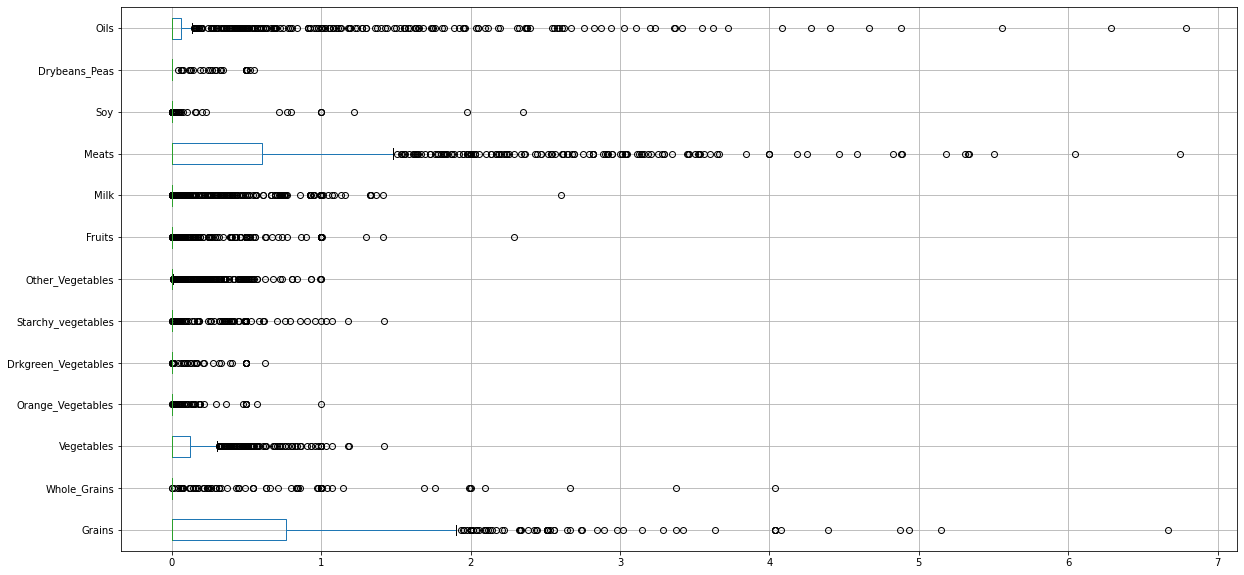

In [42]:
# Plotting the columns whose values are too small to show distribution in the whole graph.

plt.figure(figsize=(20,10))
merge_df.iloc[: ,3:17].boxplot(vert=False)
plt.show()

In [43]:
# Checking for the outliers in Grains column

grains_df=merge_df.nlargest(5, 'Grains')
grains_df

,Food_Code,Food_Name,Portion_Amount,Portion_Display_Name,Grains,Whole_Grains,Vegetables,Orange_Vegetables,Drkgreen_Vegetables,Starchy_vegetables,...,Carbohydrate_(g),Water_(g),Caffeine_(mg),Calcium_(mg),Iron_(mg),Vitamin_D_(mcg),Vitamin_E_(mg),Vitamin_C_(mg),Cholesterol_(mg),Fatty_acids_(g)
2157,54408020,Soft pretzel,1.0,medium (4 oz),6.66770,0.0,0.00000,0.00000,0.00000,0.0,...,69.3900,15.0000,0.0,23.0,3.9199,0.0,0.5400,0.0000,0.0,0.6950
1211,58200100,"Wrap sandwich (meat, vegetables, rice)",1.0,wrap,5.14837,0.0,0.51094,0.00000,0.16021,0.0,...,18.3700,66.1800,0.0,32.0,1.2500,0.0,0.4500,4.7999,30.0,1.6790
1165,58108010,Meat & cheese calzone or stromboli,0.5,calzone or stromboli,4.93112,0.0,0.00000,0.00000,0.00000,0.0,...,30.8599,34.1800,0.0,182.0,2.2599,0.2,1.1298,0.0000,42.0,6.2900
1042,58200200,"Wrap sandwich (vegetables, rice)",1.0,wrap,4.87628,0.0,0.86860,0.14948,0.00000,0.0,...,19.9499,70.9398,0.0,34.0,1.1498,0.1,0.4000,11.6000,9.0,1.9178
1726,27510360,Bacon cheeseburger on bun,1.0,cheeseburger,4.39488,0.0,0.47808,0.00000,0.00000,0.0,...,23.8200,46.8599,0.0,88.0,2.6900,0.1,0.3100,0.6000,39.0,5.5160


__Note:__ After research found that these values are appropriate. 

In [44]:
# Checking for the outliers in Solid Fats column
fat_df=merge_df.nlargest(5, 'Solid_Fats')
fat_df

,Food_Code,Food_Name,Portion_Amount,Portion_Display_Name,Grains,Whole_Grains,Vegetables,Orange_Vegetables,Drkgreen_Vegetables,Starchy_vegetables,...,Carbohydrate_(g),Water_(g),Caffeine_(mg),Calcium_(mg),Iron_(mg),Vitamin_D_(mcg),Vitamin_E_(mg),Vitamin_C_(mg),Cholesterol_(mg),Fatty_acids_(g)
1174,58125110,"Quiche (with meat, poultry or fish)",1.0,"piece (1/8 of 9"" quiche)",1.81824,0.00000,0.00576,0.0,0.0,0.00000,...,12.6099,39.0399,0.0,213.0,1.0500,0.8,0.8000,0.4,155.0,15.420
1165,58108010,Meat & cheese calzone or stromboli,0.5,calzone or stromboli,4.93112,0.00000,0.00000,0.0,0.0,0.00000,...,30.8599,34.1800,0.0,182.0,2.2599,0.2,1.1298,0.0,42.0,6.290
1246,58104530,Chicken chimichanga,1.0,chimichanga,1.76412,0.00000,0.33123,0.0,0.0,0.00000,...,30.6700,44.8599,0.0,114.0,2.2500,0.1,1.1798,1.6,17.0,3.069
1748,28141010,Fried chicken frozen meal,1.0,large meal (16 oz),1.68480,0.15444,0.90792,0.0,0.0,0.90324,...,18.3599,58.0700,0.0,19.0,0.9300,0.1,0.7600,3.0,42.0,2.560
1179,58127330,"Sausage, egg, and cheese croissant",1.0,croissant,1.75377,0.00000,0.00000,0.0,0.0,0.00000,...,15.9000,48.1000,0.0,90.0,1.6498,0.7,1.5400,0.1,123.0,8.342


__Note:__ After research found that these values are appropriate. 

In [45]:
# shape of dataframe
merge_df.shape

(915, 34)

In [46]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 915 entries, 0 to 2246
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Food_Code             915 non-null    object 
 1   Food_Name             915 non-null    object 
 2   Portion_Amount        915 non-null    float64
 3   Portion_Display_Name  915 non-null    object 
 4   Grains                915 non-null    float64
 5   Whole_Grains          915 non-null    float64
 6   Vegetables            915 non-null    float64
 7   Orange_Vegetables     915 non-null    float64
 8   Drkgreen_Vegetables   915 non-null    float64
 9   Starchy_vegetables    915 non-null    float64
 10  Other_Vegetables      915 non-null    float64
 11  Fruits                915 non-null    float64
 12  Milk                  915 non-null    float64
 13  Meats                 915 non-null    float64
 14  Soy                   915 non-null    float64
 15  Drybeans_Peas         

In [47]:
merge_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Portion_Amount,915.0,0.944536,0.624533,0.25,1.0000,1.0000,1.000000,10.00000
Grains,915.0,0.494167,0.830443,0.00,0.0000,0.0000,0.763420,6.66770
Whole_Grains,915.0,0.054516,0.286809,0.00,0.0000,0.0000,0.000000,4.03830
Vegetables,915.0,0.117170,0.226158,0.00,0.0000,0.0000,0.122005,1.41860
Orange_Vegetables,915.0,0.009118,0.060534,0.00,0.0000,0.0000,0.000000,1.00064
Drkgreen_Vegetables,915.0,0.008116,0.054616,0.00,0.0000,0.0000,0.000000,0.62208
Starchy_vegetables,915.0,0.032952,0.139865,0.00,0.0000,0.0000,0.000000,1.41860
Other_Vegetables,915.0,0.067003,0.160838,0.00,0.0000,0.0000,0.003055,1.00000
Fruits,915.0,0.053502,0.189033,0.00,0.0000,0.0000,0.000000,2.29336
Milk,915.0,0.090673,0.253139,0.00,0.0000,0.0000,0.000000,2.60568


__Characteristics of the data after cleaning and sanity check__

- After cleaning the data it contains 915 rows and 34 columns.
- All the columns have appropriate data types
- There are no missing values in the data. 


## Analysis 

In [48]:
import plotly.io as pio
import plotly.express as px
pio.renderers
#Setting the default plot display as image

pio.renderers.default = "png"

__Which food items are high source of Calcium?__

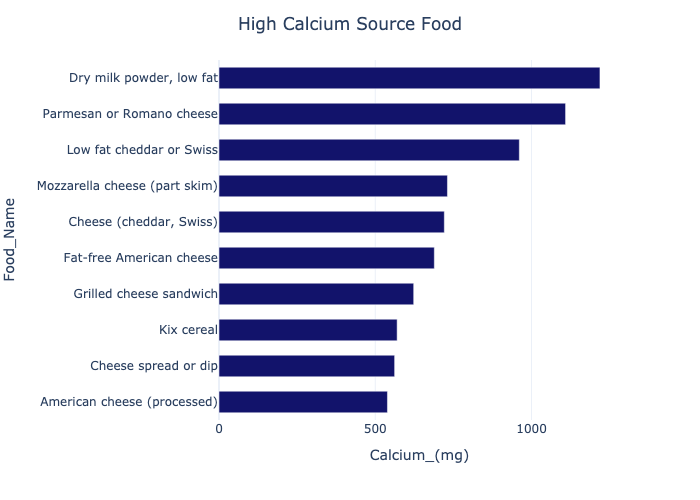

In [49]:
# Creating new dataframe form top 10 food items with high calcium.
calcium_df=merge_df.nlargest(10, 'Calcium_(mg)')
calcium_df.head()

#plotting a graph
fig = px.bar(calcium_df, y="Food_Name", x='Calcium_(mg)', orientation='h',template="plotly_white")
fig.update_layout(yaxis=dict(autorange="reversed"), title={'text' :'High Calcium Source Food',
            'x':0.5,
            'xanchor': 'center'})
fig.update_traces(marker_color='#12136b',width=0.6)
fig.show()

__Insight:__ From the plot we can say that dry milk powder and all types of cheese have high amounts of calcium in it.

__Which food items are high amount of added sugar?__

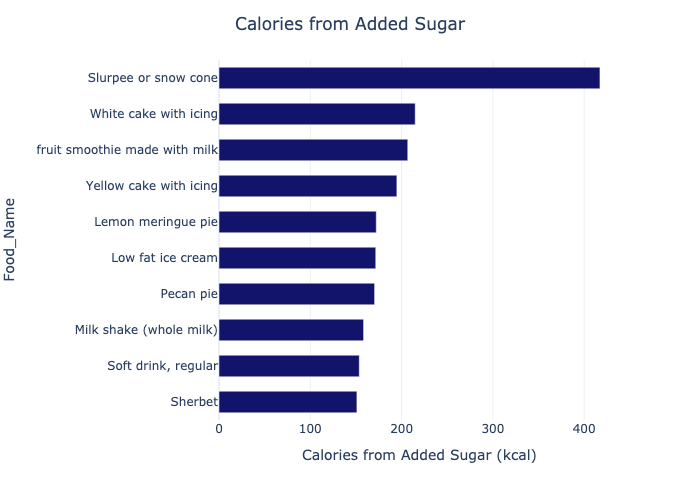

In [50]:
# Creating new dataframe form top 10 food items with high calories from added sugar.
sugar_df= merge_df.nlargest(10, 'Added_Sugars')

fig = px.bar(sugar_df, y="Food_Name", x='Added_Sugars', orientation='h',template="plotly_white")
fig.update_layout(yaxis=dict(autorange="reversed"), title={'text' :'Calories from Added Sugar',
            'x':0.5,
            'xanchor': 'center'},
             xaxis_title=" Calories from Added Sugar (kcal)")
fig.update_traces(marker_color='#12136b',width=0.6)


fig.show()


__Insight:__ Plot shows slurpee has the high amount of added sugar which makes sense  as it just water and sugar with added flavors. Also all the dessert cakes with icings have high amount of added sugars.

__Which drink has the high calories from alcohol?__

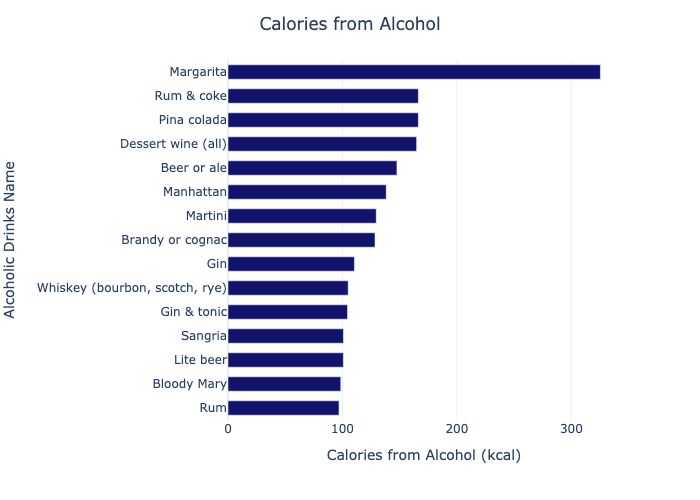

In [51]:
# Creating new dataframe of food items whose highest calories source is alcohol

alc_df= merge_df.nlargest(15, 'Alcohol')

fig = px.bar(alc_df, y="Food_Name", x='Alcohol', orientation='h',template="plotly_white")
fig.update_layout(yaxis=dict(autorange="reversed"), 
                  title={'text' :'Calories from Alcohol','x':0.5,'xanchor': 'center'},
                 xaxis_title=" Calories from Alcohol (kcal)",
                 yaxis_title="Alcoholic Drinks Name")
fig.update_traces(marker_color='#12136b',width=0.6)
fig.show()


__Insight__ Margarita drink has high calories. After research found this value is true.

__Finding the Correlation between the type of food and nutrients in it__

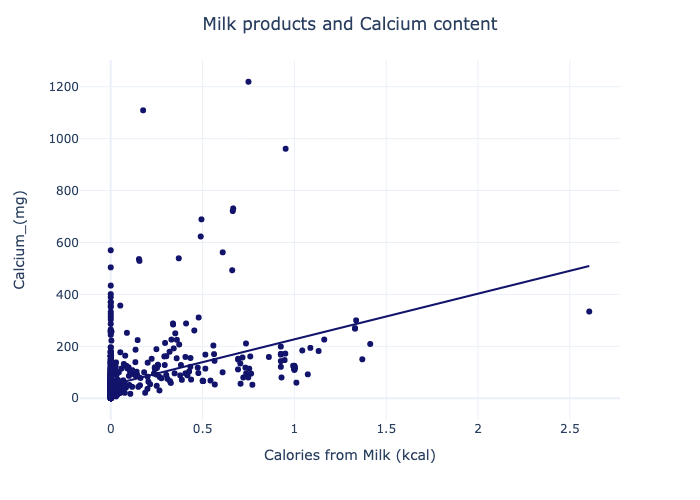

In [52]:
fig = px.scatter(merge_df, x="Milk", y="Calcium_(mg)", trendline="ols",template="plotly_white")

fig.update_layout(
                  title={'text' :'Milk products and Calcium content','x':0.5,'xanchor': 'center'},
                 xaxis_title=" Calories from Milk (kcal) ",
                 yaxis_title="Calcium_(mg)")
fig.update_traces(marker_color='#12136b')
fig.show()

__Observation__ This graph shows the positive correlation between milk products and amount of calcium present in those products. There are some products aligned on Y-axis. Those products are may be fruits, fish, lentils which are also high source of calcium.

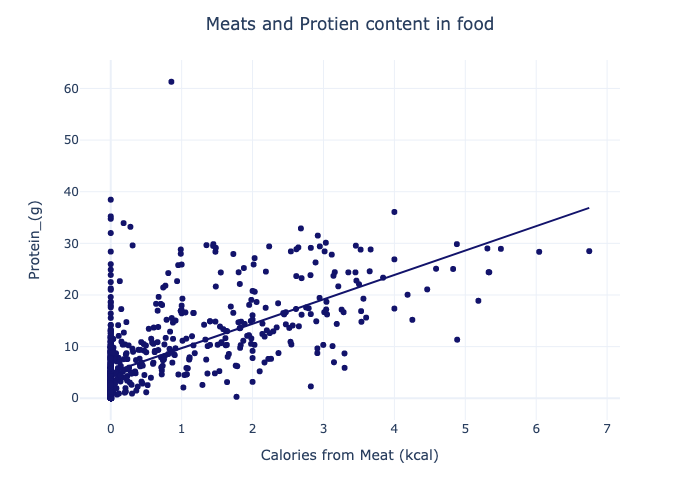

In [53]:
fig = px.scatter(merge_df, x="Meats", y="Protein_(g)", trendline="ols",template="plotly_white")

fig.update_layout(
                  title={'text' :'Meats and Protien content in food','x':0.5,'xanchor': 'center'},
                 xaxis_title=" Calories from Meat (kcal)",
                 yaxis_title="Protein_(g)")
fig.update_traces(marker_color='#12136b')
fig.show()

__Insight__ Graph shows the positive correlation between meat products and amount of protein present in those products.

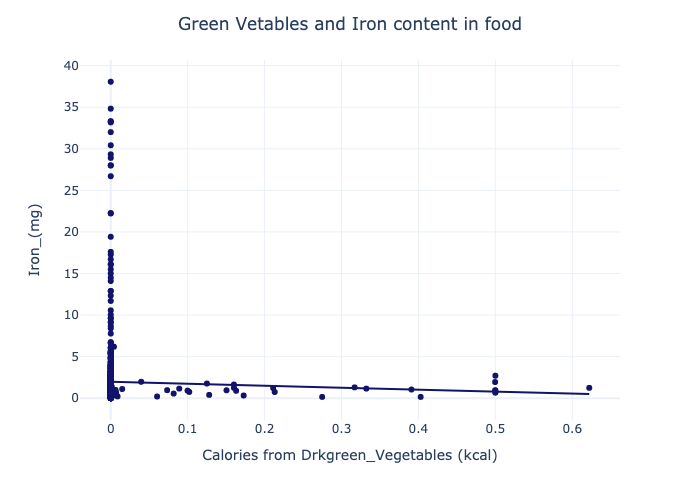

In [54]:
fig = px.scatter(merge_df, x="Drkgreen_Vegetables", y="Iron_(mg)", trendline="ols",template="plotly_white")

fig.update_layout(
                  title={'text' :'Green Vetables and Iron content in food','x':0.5,'xanchor': 'center'},
                 xaxis_title=" Calories from Drkgreen_Vegetables (kcal)",
                
                 yaxis_title="Iron_(mg)")
fig.update_traces(marker_color='#12136b')
fig.show()

__Insight__ We cannot see any correlation between products containing dark green vegetables and amount of iron present in those products. The reason may be those foods are processed which reduced the iron content.

In [55]:
# Creating a dataframe which has top 10 high calories food

calories_df=merge_df.nlargest(10, 'Calories')
calories_df.T

,1748,1211,67,1726,1165,1042,1234,1724,1730,1249
Food_Code,28141010,58200100,21103120,27510360,58108010,58200200,58100140,27510300,27510700,58104730
Food_Name,Fried chicken frozen meal,"Wrap sandwich (meat, vegetables, rice)",Breaded fried steak (eat lean & fat),Bacon cheeseburger on bun,Meat & cheese calzone or stromboli,"Wrap sandwich (vegetables, rice)","Beef, bean, and cheese burrito",Double cheeseburger on double deck bun,Meatball Sub,Meat and cheese quesadilla
Portion_Amount,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0
Portion_Display_Name,large meal (16 oz),wrap,medium steak,cheeseburger,calzone or stromboli,wrap,Taco Bell burrito,double cheeseburger,"6"" sub",quesadilla
Grains,1.6848,5.14837,1.97559,4.39488,4.93112,4.87628,1.82325,3.28832,2.44416,2.32944
Whole_Grains,0.15444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Vegetables,0.90792,0.51094,0.0,0.47808,0.0,0.8686,0.05865,0.38304,0.49044,0.0368
Orange_Vegetables,0.0,0.0,0.0,0.0,0.0,0.14948,0.0,0.0,0.0,0.0
Drkgreen_Vegetables,0.0,0.16021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Starchy_vegetables,0.90324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


__Insight__ 
- Above dataframe shows the high calories food items. Which shows Frozen fried chicken large meal has the highest calories. 

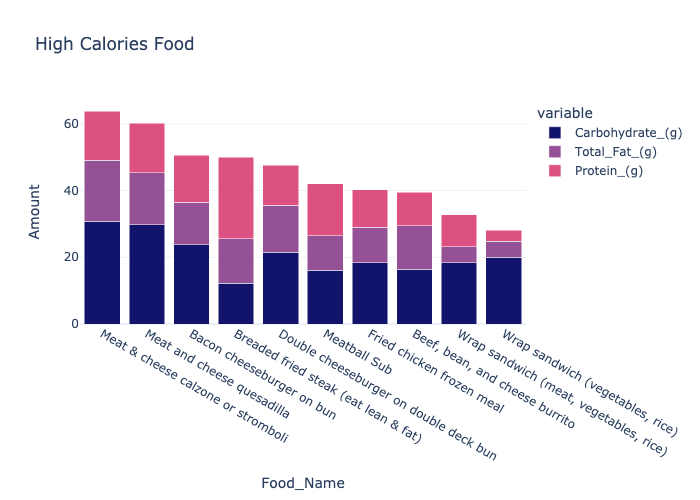

In [56]:
#Boxplot of nutrients in the high calories food.

fig = px.bar(calories_df, x="Food_Name", y=["Carbohydrate_(g)", "Total_Fat_(g)","Protein_(g)"],
             title="High Calories Food ",
             color_discrete_map={"Carbohydrate_(g)": "#12136b", 
                                 "Total_Fat_(g)": "#955196",
                                 "Protein_(g)":"#dd5182"},
            template="plotly_white")
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'},yaxis_title="Amount")
fig.show()

__Insight__ 
- This graph shows the carbohydrate, fat and protein in these high calorie food.
- We can consider these proportions to balance our diet accordingly.

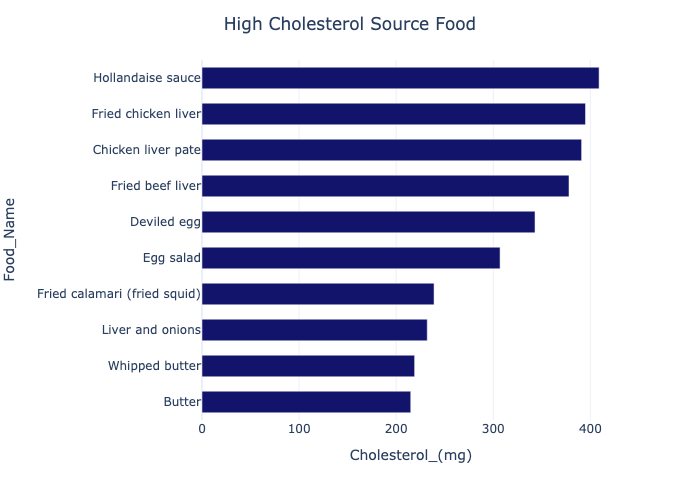

In [57]:
#Creating a new dataframe with high amount of Cholesterol containing foods

chol_df=merge_df.nlargest(10, 'Cholesterol_(mg)')
fig = px.bar(chol_df, y="Food_Name", x='Cholesterol_(mg)', orientation='h',template="plotly_white")
fig.update_layout(yaxis=dict(autorange="reversed"), title={'text' :'High Cholesterol Source Food',
            'x':0.5,
            'xanchor': 'center'})
fig.update_traces(marker_color='#12136b',width=0.6)
fig.show()

__Insight__ Hollandaise Sause is a combination of egg yolk, melted butter so it contains high amount of cholesterol. 

### Learnings from this project

1] Before merging two datasets we need to consider common factors in the data, how they are related, there units and measurement. If we get both the data from same source it is much easier than other options.

2] Plotly graphs are not directly visible in the GitHub due to their high resolution compatability, so we need to set default renderer as image to display the graphs.

3] How to plot boxplot on whole dataframe in single line.

4] Analysis of the data showed all type of cheese are good source of calcium (I used to consider cheese as unhealthy due to amount of fat in it)

5] Icing on the cake adds lot of calories due to added sugar.

6] High calories alcoholic drink is Margarita.

7] Cholesterol content in the processed food is most unhealthy.
